## BDAT 1004- Data Programming - Problem Set #3

#### Student Name: Qays Omar 
#### Student ID: 200414154

### Question 1
#### Occupations

In [4]:
#Step 1. Import the necessary libraries

import numpy as np
import matplotlib.pyplot as pp 
import pandas as pd

In [5]:
#Step 2. Import the dataset from the provided address.
#Step 3. Assign it to a variable called users

users = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep="|" )
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [6]:
#Step 4. Discover what is the mean age per occupation

#users.mean()
#users.describe()
users.groupby('occupation')['age'].mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [ ]:
#Step 5. Discover the Male ratio per occupation and sort it from the most to the least

users2 = users.groupby(['occupation','gender'])['user_id'].count()
maleRatio =(users2 / (users2.groupby('occupation').sum())
maleRatio

In [8]:
#Step 6. For each occupation, calculate the minimum and maximum ages

users.groupby(['occupation']).agg({'age':['min','max']})

age    
              min max
occupation           
administrator  21  70
artist         19  48
doctor         28  64
educator       23  63
engineer       22  70
entertainment  15  50
executive      22  69
healthcare     22  62
homemaker      20  50
lawyer         21  53
librarian      23  69
marketing      24  55
none           11  55
other          13  64
programmer     20  63
retired        51  73
salesman       18  66
scientist      23  55
student         7  42
technician     21  55
writer         18  60

In [9]:
#Step 7. For each combination of occupation and sex, calculate the mean age

M_age = users.groupby(['occupation','gender'])['age'].mean()
M_age

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

### Question 2
#### Euro Teams

In [11]:
#Step 1. Import the necessary libraries

import numpy as np 
import matplotlib.pyplot as pp #
import pandas as pd
import functools

In [12]:
#Step 2. Import the dataset from the provided address :https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv
#Step 3. Assign it to a variable called euro12

euro12 = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv', sep="," )
euro12 = euro12.set_index(['Team'])
euro12

,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
Team,,,,,,,,,,,,,,,,,,,,,
Croatia,4,13,12,51.9%,16.0%,32,0,0,0,2,...,13,81.3%,41,62,2,9,0,9,9,16
Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
Denmark,4,10,10,50.0%,20.0%,27,1,0,0,3,...,10,66.7%,25,38,8,4,0,7,7,15
England,5,11,18,50.0%,17.2%,40,0,0,0,3,...,22,88.1%,43,45,6,5,0,11,11,16
France,3,22,24,37.9%,6.5%,65,1,0,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
Germany,10,32,32,47.8%,15.6%,80,2,1,0,2,...,10,62.6%,63,49,12,4,0,15,15,17
Greece,5,8,18,30.7%,19.2%,32,1,1,1,0,...,13,65.1%,67,48,12,9,1,12,12,20
Italy,6,34,45,43.0%,7.5%,110,2,0,0,2,...,20,74.1%,101,89,16,16,0,18,18,19
Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,0,...,12,70.6%,35,30,3,5,0,7,7,15


In [13]:
#Step 4. Select only the Goal column
dfGoal = euro12['Goals']
print(dfGoal)

Team
Croatia                 4
Czech Republic          4
Denmark                 4
England                 5
France                  3
Germany                10
Greece                  5
Italy                   6
Netherlands             2
Poland                  2
Portugal                6
Republic of Ireland     1
Russia                  5
Spain                  12
Sweden                  5
Ukraine                 2
Name: Goals, dtype: int64


In [14]:
#Step 5. How many team participated in the Euro2012?

#euro12.describe()

TeamNo = len(euro12)
TeamNo

16

In [15]:
#Step 6. What is the number of columns in the dataset?

print("Total Number of Columns: ", len(euro12.columns))

Total Number of Columns:  34


In [16]:
#Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

df1 = pd.DataFrame(euro12)
discipline= df1[['Yellow Cards', 'Red Cards']]
discipline

,Yellow Cards,Red Cards
Team,,
Croatia,9,0
Czech Republic,7,0
Denmark,4,0
England,5,0
France,6,0
Germany,4,0
Greece,9,1
Italy,16,0
Netherlands,5,0


In [17]:
#Step 8. Sort the teams by Red Cards, then to Yellow Cards

YCdf = discipline.sort_values(by = "Yellow Cards")
YCdf

,Yellow Cards,Red Cards
Team,,
Denmark,4,0
Germany,4,0
England,5,0
Netherlands,5,0
Ukraine,5,0
France,6,0
Republic of Ireland,6,1
Russia,6,0
Czech Republic,7,0


In [18]:
RCardf = discipline.sort_values(by = "Red Cards")
RCardf

,Yellow Cards,Red Cards
Team,,
Croatia,9,0
Czech Republic,7,0
Denmark,4,0
England,5,0
France,6,0
Germany,4,0
Italy,16,0
Netherlands,5,0
Portugal,12,0


In [19]:
#Step 9. Calculate the mean Yellow Cards given per Team

euro12.mean()

euro12["Yellow Cards"].mean()

7.4375

In [20]:
#Step 10. Filter teams that scored more than 6 goals

F_df = euro12.iloc[:,0:2]
scored_goals = F_df[F_df["Goals"] >= 6]
scored_goals

,Goals,Shots on target
Team,,
Germany,10,32
Italy,6,34
Portugal,6,22
Spain,12,42


In [22]:
#Step 12. Select the first 7 columns

len(euro12.columns)

34

In [23]:
#Step 13. Select all columns except the last 3

#euro12.info() 

Select_Cols= euro12.iloc[:,0:31]
Select_Cols

,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
Team,,,,,,,,,,,,,,,,,,,,,
Croatia,4,13,12,51.9%,16.0%,32,0,0,0,2,...,0,10,3,13,81.3%,41,62,2,9,0
Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
Denmark,4,10,10,50.0%,20.0%,27,1,0,0,3,...,1,10,5,10,66.7%,25,38,8,4,0
England,5,11,18,50.0%,17.2%,40,0,0,0,3,...,2,29,3,22,88.1%,43,45,6,5,0
France,3,22,24,37.9%,6.5%,65,1,0,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
Germany,10,32,32,47.8%,15.6%,80,2,1,0,2,...,1,11,6,10,62.6%,63,49,12,4,0
Greece,5,8,18,30.7%,19.2%,32,1,1,1,0,...,1,23,7,13,65.1%,67,48,12,9,1
Italy,6,34,45,43.0%,7.5%,110,2,0,0,2,...,2,18,7,20,74.1%,101,89,16,16,0
Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,0,...,0,9,5,12,70.6%,35,30,3,5,0


In [24]:
#Step 14. Present only the Shooting Accuracy from England, Italy and Russia


euro12 = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv', sep="," )

Acc_dF = euro12.loc[:,['Team','Shooting Accuracy']]
Acc_dF

,Team,Shooting Accuracy
0,Croatia,51.9%
1,Czech Republic,41.9%
2,Denmark,50.0%
3,England,50.0%
4,France,37.9%
5,Germany,47.8%
6,Greece,30.7%
7,Italy,43.0%
8,Netherlands,25.0%
9,Poland,39.4%


In [25]:
Q= pd.DataFrame([{'Team': 'England'}, {'Team': 'Italy'}, {'Team': 'Russia'}])
Q


,Team
0,England
1,Italy
2,Russia


### Question 3
#### Housing

In [26]:
#Step 1. Import the necessary libraries

import numpy as np
import numpy as np
import matplotlib.pyplot as pp
import pandas as pd

In [27]:
#Step 2. Create 3 different Series, each of length 100, as follows:
# The first a random number from 1 to 4

Series1 = np.linspace(1,4,100)
Series1

array([1.        , 1.03030303, 1.06060606, 1.09090909, 1.12121212,
       1.15151515, 1.18181818, 1.21212121, 1.24242424, 1.27272727,
       1.3030303 , 1.33333333, 1.36363636, 1.39393939, 1.42424242,
       1.45454545, 1.48484848, 1.51515152, 1.54545455, 1.57575758,
       1.60606061, 1.63636364, 1.66666667, 1.6969697 , 1.72727273,
       1.75757576, 1.78787879, 1.81818182, 1.84848485, 1.87878788,
       1.90909091, 1.93939394, 1.96969697, 2.        , 2.03030303,
       2.06060606, 2.09090909, 2.12121212, 2.15151515, 2.18181818,
       2.21212121, 2.24242424, 2.27272727, 2.3030303 , 2.33333333,
       2.36363636, 2.39393939, 2.42424242, 2.45454545, 2.48484848,
       2.51515152, 2.54545455, 2.57575758, 2.60606061, 2.63636364,
       2.66666667, 2.6969697 , 2.72727273, 2.75757576, 2.78787879,
       2.81818182, 2.84848485, 2.87878788, 2.90909091, 2.93939394,
       2.96969697, 3.        , 3.03030303, 3.06060606, 3.09090909,
       3.12121212, 3.15151515, 3.18181818, 3.21212121, 3.24242

In [28]:
# The second a random number from 1 to 3

Series2 = np.linspace(1,3,100)
Series2

array([1.        , 1.02020202, 1.04040404, 1.06060606, 1.08080808,
       1.1010101 , 1.12121212, 1.14141414, 1.16161616, 1.18181818,
       1.2020202 , 1.22222222, 1.24242424, 1.26262626, 1.28282828,
       1.3030303 , 1.32323232, 1.34343434, 1.36363636, 1.38383838,
       1.4040404 , 1.42424242, 1.44444444, 1.46464646, 1.48484848,
       1.50505051, 1.52525253, 1.54545455, 1.56565657, 1.58585859,
       1.60606061, 1.62626263, 1.64646465, 1.66666667, 1.68686869,
       1.70707071, 1.72727273, 1.74747475, 1.76767677, 1.78787879,
       1.80808081, 1.82828283, 1.84848485, 1.86868687, 1.88888889,
       1.90909091, 1.92929293, 1.94949495, 1.96969697, 1.98989899,
       2.01010101, 2.03030303, 2.05050505, 2.07070707, 2.09090909,
       2.11111111, 2.13131313, 2.15151515, 2.17171717, 2.19191919,
       2.21212121, 2.23232323, 2.25252525, 2.27272727, 2.29292929,
       2.31313131, 2.33333333, 2.35353535, 2.37373737, 2.39393939,
       2.41414141, 2.43434343, 2.45454545, 2.47474747, 2.49494

In [29]:
# The third a random number from 10,000 to 30,000
Series3= np.linspace(10000, 30000,100)
Series3

array([10000.        , 10202.02020202, 10404.04040404, 10606.06060606,
       10808.08080808, 11010.1010101 , 11212.12121212, 11414.14141414,
       11616.16161616, 11818.18181818, 12020.2020202 , 12222.22222222,
       12424.24242424, 12626.26262626, 12828.28282828, 13030.3030303 ,
       13232.32323232, 13434.34343434, 13636.36363636, 13838.38383838,
       14040.4040404 , 14242.42424242, 14444.44444444, 14646.46464646,
       14848.48484848, 15050.50505051, 15252.52525253, 15454.54545455,
       15656.56565657, 15858.58585859, 16060.60606061, 16262.62626263,
       16464.64646465, 16666.66666667, 16868.68686869, 17070.70707071,
       17272.72727273, 17474.74747475, 17676.76767677, 17878.78787879,
       18080.80808081, 18282.82828283, 18484.84848485, 18686.86868687,
       18888.88888889, 19090.90909091, 19292.92929293, 19494.94949495,
       19696.96969697, 19898.98989899, 20101.01010101, 20303.03030303,
       20505.05050505, 20707.07070707, 20909.09090909, 21111.11111111,
      

In [30]:
#Step 3. Create a DataFrame by joinning the Series by column

df1 = pd.DataFrame(Series1)
df2 = pd.DataFrame(Series2)
df3 = pd.DataFrame(Series3)
 
df1
df2
df3

,0
0,10000.000000
1,10202.020202
2,10404.040404
3,10606.060606
4,10808.080808
...,...
95,29191.919192
96,29393.939394
97,29595.959596
98,29797.979798


In [31]:
SeriesDF  =pd.concat([df1, df2, df3 ], axis=1)
SeriesDF

,0,0,0
0,1.000000,1.000000,10000.000000
1,1.030303,1.020202,10202.020202
2,1.060606,1.040404,10404.040404
3,1.090909,1.060606,10606.060606
4,1.121212,1.080808,10808.080808
...,...,...,...
95,3.878788,2.919192,29191.919192
96,3.909091,2.939394,29393.939394
97,3.939394,2.959596,29595.959596
98,3.969697,2.979798,29797.979798


In [32]:
#Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

SeriesDF.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
SeriesDF

,bedrs,bathrs,price_sqr_meter
0,1.000000,1.000000,10000.000000
1,1.030303,1.020202,10202.020202
2,1.060606,1.040404,10404.040404
3,1.090909,1.060606,10606.060606
4,1.121212,1.080808,10808.080808
...,...,...,...
95,3.878788,2.919192,29191.919192
96,3.909091,2.939394,29393.939394
97,3.939394,2.959596,29595.959596
98,3.969697,2.979798,29797.979798


In [33]:
#Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

OneColumnDF= pd.concat([df1, df2,df3], join="inner")
OneColumnDF.columns = ['bigcolumn']
OneColumnDF


,bigcolumn
0,1.000000
1,1.030303
2,1.060606
3,1.090909
4,1.121212
...,...
95,29191.919192
96,29393.939394
97,29595.959596
98,29797.979798


In [34]:
#Step 6. Ops it seems it is going only until index 99. Is it true?

#Yes it is true, index is until 99

OneColumnDF

,bigcolumn
0,1.000000
1,1.030303
2,1.060606
3,1.090909
4,1.121212
...,...
95,29191.919192
96,29393.939394
97,29595.959596
98,29797.979798


In [35]:
#Step 7. Reindex the DataFrame so it goes from 0 to 299


### Question 4
#### Wind Statistics

The data have been modified to contain some missing values, identified by NaN. Using pandas should make this exercise easier, in particular for the bonus question. You should be able to perform all of these operations without using a for loop or
other looping construct.

Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL
MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71

The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.

In [36]:
#Step 1. Import the necessary libraries

import numpy as np
import numpy as np
import matplotlib.pyplot as pp
import pandas as pd

In [40]:
#Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [41]:
#Step 6. Compute how many values are missing for each location over the entirerecord.They should be ignored in all calculations below.

In [300]:
#Step 7. Compute how many non-missing values there are in total.

In [301]:
#Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times A single number for the entire dataset.

In [302]:
#Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days A different set of numbers for each location.

In [303]:
#Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day.

In [304]:
#Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.

In [305]:
#Step 12. Downsample the record to a yearly frequency for each location.

In [306]:
#Step 13. Downsample the record to a monthly frequency for each location.

In [307]:
#Step 14. Downsample the record to a weekly frequency for each location

In [308]:
#Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on # January 2 1961) for the first 52 weeks.

In [326]:
#Step 17. How many different items are sold?

### Question 6

Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

In [42]:
%load_ext sql

In [43]:
%sql sqlite://

'Connected: @None'

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
sns.set(color_codes=True)

from scipy import stats , integrate
np.random.seed((sum(map(ord, "ditributions"))))
np.random.seed((sum(map(ord, "regression"))))

In [46]:
#Third Part is to read dataset from csv File
dfA = pd.read_csv('D:\\Big Data Analytics\\Courses\\Thu-Data Programming - BDAT 1004\\Problem Set #3\\us-marriages-divorces-1867-2014.csv')

dfA

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


Text(0.5, 1.0, 'Number of marriages and divorces per capita in the U.S.')

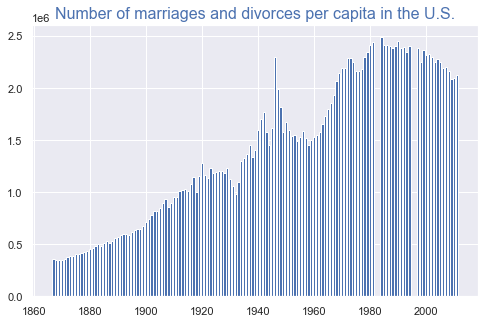

In [47]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize = (8,5))
plt.bar(x = dfA['Year'], height = dfA['Marriages'])
plt.title("Number of marriages and divorces per capita in the U.S.", fontsize=16, color="b")

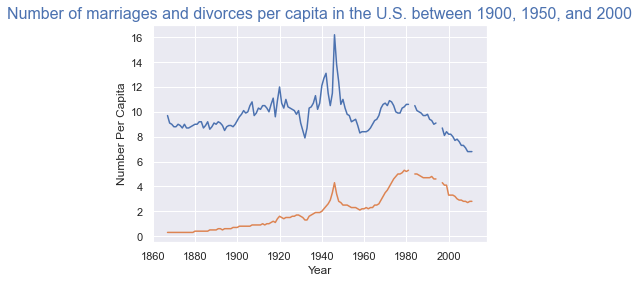

In [63]:

year = dfA['Year'].values
Marriage = dfA['Marriages_per_1000'].values
Divorce = dfA['Divorces_per_1000'].values

plt.title("Number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000", fontsize=16, color="b")
plt.xlabel('Year')
plt.ylabel('Number Per Capita')
plt.plot(year, Marriage)
plt.plot(year, Divorce)


### Question 7

Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

Text(0.5, 1.0, 'Number of marriages and divorces per capita in the U.S. ')

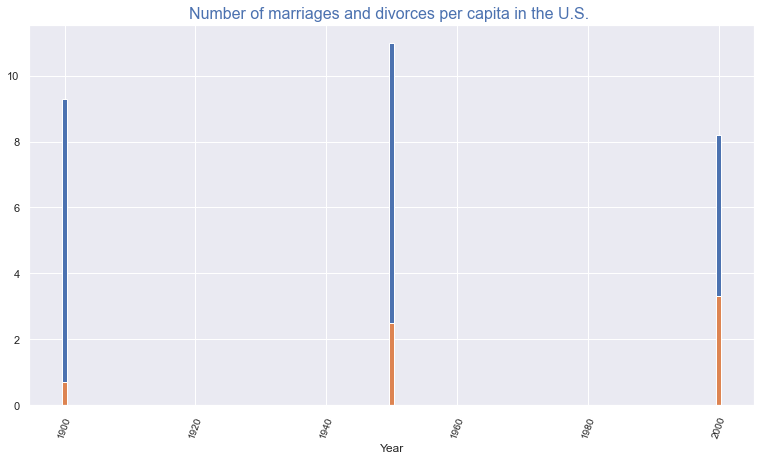

In [66]:
%matplotlib inline 
import pandas as pd 
import matplotlib.pyplot as plt
import pylab

dfB = pd.read_csv('D:\\Big Data Analytics\\Courses\\Thu-Data Programming - BDAT 1004\\Problem Set #3\\us-marriages-divorces-1867-2014.csv')


dfB = dfB[dfB['Year'].apply(lambda x: x in [1900, 1950, 2000])]
    
plt.figure(figsize = (13,7))

plt.bar(x=dfB['Year'], height = dfB['Marriages_per_1000'])
plt.bar(x=dfB['Year'], height = dfB['Divorces_per_1000'])

plt.xticks(rotation =70, fontsize = 10)
plt.xlabel('Year')
plt.title("Number of marriages and divorces per capita in the U.S. ", fontsize=16, color="b")

### Question 8

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

In [67]:
%matplotlib inline 
import pandas as pd 
import matplotlib.pyplot as plt
import pylab

dfRoman = pd.read_csv('D:\\Big Data Analytics\\Courses\\Thu-Data Programming - BDAT 1004\\Problem Set #3\\roman-emperor-reigns.csv')

Eemperors = dfRoman['Cause_of_Death'].values

Eemperors

array(['Possibly assassinated', 'Possibly assassinated', 'Assassinated',
       'Possibly assassinated', 'Suicide', 'Assassinated', 'Suicide',
       'Assassinated', 'Natural causes', 'Illness', 'Assassinated',
       'Natural causes', 'Natural causes', 'Natural causes',
       'Natural causes', 'Illness', 'Illness', 'Assassinated',
       'Assassinated', 'Executed', 'Natural causes', 'Assassinated',
       'Assassinated', 'Executed', 'Assassinated', 'Assassinated',
       'Assassinated', 'Suicide', 'Killed in battle', 'Assassinated',
       'Assassinated', 'Possibly assassinated', 'Killed in battle',
       'Killed in battle', 'Illness', 'Assassinated', 'Assassinated',
       'Died in captivity', 'Assassinated', 'Illness',
       'Possibly assassinated', 'Assassinated', 'Possibly assassinated',
       'Assassinated', 'Assassinated', 'Natural causes',
       'Possibly assassinated', 'Killed in battle', 'Natural causes',
       'Suicide', 'Natural causes', 'Natural causes', 'Assassinate

### Question 9

Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.

Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.

In [100]:

dfRomanB = pd.read_csv('D:\\Big Data Analytics\\Courses\\Thu-Data Programming - BDAT 1004\\Problem Set #3\\roman-emperor-reigns.csv')

Rom = dfRomanB.groupby(dfRomanB["Cause_of_Death"])["Emperor"].sum()
Rom

Cause_of_Death
Assassinated             CaligulaGalbaVitelliusDomitianCommodusPertinax...
Died in captivity                                                 Valerian
Executed                                 Didius JulianusMacrinusLicinius I
Illness                  TitusMarcus AureliusLucius VerusHostilianClaud...
Killed in battle         Gordian IIPhilip ITrajan DeciusCarinusMaxentiu...
Natural causes           VespasianNervaTrajanHadrianAntoninus PiusSepti...
Possibly assassinated    AugustusTiberiusClaudiusGordian IIIQuintillusT...
Suicide                              NeroOthoGordian IMaximianMaximinus II
Name: Emperor, dtype: object

### Question 10


Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.

Don't forget to label your axes! Color each dot according to its year.

In [ ]:
import plotly 
import cufflinks as cf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

Arcade = pd.read_csv('D:\\Big Data Analytics\\Courses\\Thu-Data Programming - BDAT 1004\\Problem Set #3\\arcade-revenue-vs-cs-doctorates.csv')
ArcadeRevenue = Arcade['Total Arcade Revenue (billions)'].values
ComputerScienceAwarded = Arcade ['Computer Science Doctorates Awarded (US)'].values


In [87]:
Arcade

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


In [88]:
Arcade.set_index('Year', inplace=True)

In [89]:
Arcade

,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
Year,,
2000,1.196,861
2001,1.176,830
2002,1.269,809
2003,1.240,867
2004,1.307,948
2005,1.435,1129
2006,1.601,1453
2007,1.654,1656
2008,1.803,1787


In [90]:
ArcadeRevenue

array([1.196, 1.176, 1.269, 1.24 , 1.307, 1.435, 1.601, 1.654, 1.803,
       1.734])

In [91]:
ComputerScienceAwarded

array([ 861,  830,  809,  867,  948, 1129, 1453, 1656, 1787, 1611],
      dtype=int64)

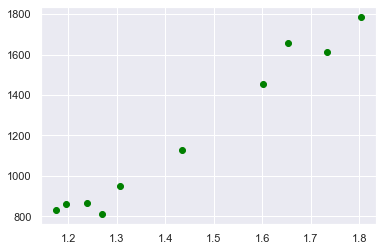

In [93]:

plt.scatter(Arcade['Total Arcade Revenue (billions)'],Arcade['Computer Science Doctorates Awarded (US)'], color='green')
